# Importa dependências

In [2]:
from numpy import arange, abs, array, pi, set_printoptions, diff

# from numpy import genfromtxt, zeros_like
from sys import path as sph
from os.path import join, abspath, dirname
from os import getcwd
from pandas import read_excel
from scipy.optimize import minimize, shgo, differential_evolution
import matplotlib.pyplot as plt

# import time
import pickle

# import matplotlib.pyplot as plt

dir = dirname(
    r"c:\\Users\\INTEL\\Documents\\MEGA\\Mestrado\\00 Circuito DTG\\3. pyPB\\cases\\murilo\\teste1_calculate.py"
)
dir = getcwd()

sph.append(abspath(join(dir, "..\\..\\..\\2. APP/")))
sph.append(abspath(join(dir, "..\\..")))
from pbe.app.dtg_class import (
    DTGSolution,
    Import_flow_DSD2,
    DTG_experiment,
    get_location,
)
from pbe.setup.helpers import plt_config2
from utils.plot_SOGO_comparition import DTG_exp_x_sim

plt_config2(relative_fig_width=0.7)
set_printoptions(precision=4)

# Importa os testes
* O objeto experiments abarca todos os métodos para tratar e dispor dados do experimento

In [3]:
pasta = abspath(join(dir, "..\\..\\..", r"6. Compilado\\LP_PB_completo"))
testes={90: {2, 3}, 101: {2, 3}, 108: {2, 3}, 112: {2, 3}, 116: {2, 3}, 121: {2, 3}, 124: {2, 3}, 127: {2, 3}}
experiments = Import_flow_DSD2(get_location(pasta), teste=testes)

In [4]:
experiments.DTG

,N_escoam,Marco,tipo,ID,local,tempo,We,dinf,dsup,freq_v,freq_n,acum_v,GV_ANM,GV_choke,d_med
0,90,2,extrator,1,1,NaN,5.00,0.050,0.056,0.0,0.0,0.0,20.0,20.0,0.0530
1,90,2,extrator,1,1,NaN,5.00,0.056,0.063,0.0,0.0,0.0,20.0,20.0,0.0595
2,90,2,extrator,1,1,NaN,5.00,0.063,0.072,0.0,0.0,0.0,20.0,20.0,0.0675
3,90,2,extrator,1,1,NaN,5.00,0.072,0.081,0.0,0.0,0.0,20.0,20.0,0.0765
4,90,2,extrator,1,1,NaN,5.00,0.081,0.092,0.0,0.0,0.0,20.0,20.0,0.0865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,127,3,extrator,6,6,NaN,6.04,812.000,918.100,0.0,0.0,100.0,10.0,10.0,865.0500
8060,127,3,extrator,6,6,NaN,6.04,918.100,1037.000,0.0,0.0,100.0,10.0,10.0,977.5500
8061,127,3,extrator,6,6,NaN,6.04,1037.000,1173.000,0.0,0.0,100.0,10.0,10.0,1105.0000
8062,127,3,extrator,6,6,NaN,6.04,1173.000,1326.000,0.0,0.0,100.0,10.0,10.0,1249.5000


In [5]:
experiments.select_DTG(X=["E_ANM", "E_FlowLine"])
experiments.select_DTG(X=["E_ANM"])
# Como obter apenas uma DTG:
# ID vem de:
# experiments.compares['E_ANM'][0] ou [1], 0: antes, [1]: depois
# ID = experiments.compares['E_ANM'][0] ou experiments.compares['E_ANM'][1]
experiments.get_DTG(teste=90, marco=3, ID=3)

,N_escoam,Marco,tipo,ID,local,tempo,We,dinf,dsup,freq_v,freq_n,acum_v,GV_ANM,GV_choke,d_med
672,90,3,extrator,3,3,NaN,5.0,0.050,0.056,0.0,0.0,0.0,15.0,15.0,0.0530
673,90,3,extrator,3,3,NaN,5.0,0.056,0.063,0.0,0.0,0.0,15.0,15.0,0.0595
674,90,3,extrator,3,3,NaN,5.0,0.063,0.072,0.0,0.0,0.0,15.0,15.0,0.0675
675,90,3,extrator,3,3,NaN,5.0,0.072,0.081,0.0,0.0,0.0,15.0,15.0,0.0765
676,90,3,extrator,3,3,NaN,5.0,0.081,0.092,0.0,0.0,0.0,15.0,15.0,0.0865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,90,3,extrator,3,3,NaN,5.0,812.000,918.100,0.0,0.0,100.0,15.0,15.0,865.0500
752,90,3,extrator,3,3,NaN,5.0,918.100,1037.000,0.0,0.0,100.0,15.0,15.0,977.5500
753,90,3,extrator,3,3,NaN,5.0,1037.000,1173.000,0.0,0.0,100.0,15.0,15.0,1105.0000
754,90,3,extrator,3,3,NaN,5.0,1173.000,1326.000,0.0,0.0,100.0,15.0,15.0,1249.5000


# Importa propriedades

In [6]:
experiments.get_prop(dir)

# Define todos os dados experimentais em um objeto só

In [7]:
experiments.preparaDados()

In [8]:
experiments.dados

,N_emul,N_escoam,C_agua [%],Marco,ANM,TIT-02[°C],Densidade[kg/m³],FT-01[kg/min],dPGV-ANM [Pa],Re,K,Saline Water [Pa.s],Saline Water [kg/m³],AW68 [Pa.s],AW68 [kg/m³],W/O [Pa.s],W/O [kg/m³],sigma [N/m]
0,49,90,5,2,20,25.781538,876.632022,29.160886,41772.901263,223.613412,12.448066,0.000984,1020.752866,0.127844,869.149252,0.132092,876.733559,0.0045
1,49,90,5,3,15,25.752727,875.028703,29.166562,122774.318692,223.413323,12.448066,0.000985,1020.761862,0.127993,869.167298,0.132236,876.751155,0.0045
2,60,101,5,2,20,27.896656,876.060717,18.770417,21951.252235,156.463390,11.532768,0.000942,1020.075353,0.116866,867.824454,0.121517,875.440146,0.0045
3,60,101,5,3,15,27.941393,875.843771,18.769521,64106.991470,156.744505,11.532768,0.000941,1020.060661,0.116634,867.796430,0.121293,875.412752,0.0045
4,67,108,10,2,15,25.826086,882.526756,17.097970,56044.555612,115.469957,11.525884,0.000983,1020.738944,0.127613,869.121350,0.149986,884.287014,0.0045
5,67,108,10,3,12,25.869543,882.331445,17.100365,123616.758224,115.686330,11.525884,0.000983,1020.725349,0.127387,869.094130,0.149724,884.261153,0.0045
6,71,112,10,2,15,29.185334,880.724058,19.418977,67510.032707,151.640165,7.615554,0.000916,1019.646189,0.110178,867.017052,0.129714,882.281803,0.0045
7,71,112,10,3,12,29.187687,880.602248,19.419101,181425.945193,151.657734,7.615554,0.000916,1019.645394,0.110166,867.015578,0.129700,882.280394,0.0045
8,75,116,15,2,15,24.761413,889.530774,16.169840,48357.821248,93.150798,18.204271,0.001005,1021.067539,0.133138,869.788273,0.175830,892.483718,0.0045
9,75,116,15,3,12,24.770867,889.320574,16.168862,96451.875700,93.179274,18.204271,0.001005,1021.064659,0.133089,869.782350,0.175764,892.478255,0.0045


# Define a malha do balanço populacional

In [9]:
# Obtem as classe do Bettersizer e define a malha
# Create mesh
x = read_excel(dir + "/classes.xlsx")
# diameter is in micrometer and volume is in mm³
d, v = x["d"].to_numpy(), x["v [mm³]"].to_numpy()
dxi = diff(v)
xi = v[:-1] + diff(v) / 2
# Remover classes zeros
sl = slice(8, -12)
dxi, xi = dxi[sl] / 1e9, xi[sl] / 1e9  # m³
xi_d = (6 / pi * xi) ** (1.0 / 3)  # metro
M = len(xi)

experiments.reduce_DTG(M, sl)

# Define a função de simulação

In [10]:
def teste1_solve(M, xi, dxi, C, sol, data):
    pbe_solutions = DTGSolution(
        M=M,
        xi=xi,
        dxi=dxi,
        exp=sol["exp"],
        timestep=50,
        data=data,
        IDs=sol["compares"],
        marco=sol["marco"],
        model_parameters=array(C),
    )

    return pbe_solutions

# Roda a simulação

* sol.moc.phase_fraction precisa conservar
* sol.moc.total_numbers retorna o numéro total de gotas em cada tempo

In [13]:
i = 0
sol = dict()
sol["experiments"] = experiments
testes_opt = {90: {2,3}}
for N in testes_opt:
    print("Teste número", N, " Marcos: ", list(testes_opt[N]))
    IDs = experiments.compares["E_ANM"]
    for marco in testes_opt[N]:
        C0 = [0.0003372, 0.001098, 1.3237e-3, 0.00262e13]
        C0 = [6.8215e-03, 1.1980e-03, 1.3237e-03, 2.6200e10]
        C0 = [9.1609e-01, 3.6968e02, 1.3237e-03, 2.6200e9]
        #C0 = [0.4, 0.08, 2.8e-6, 1.83e9]   # C&T original constants
        exp = experiments.dados.loc[
            (experiments.dados["Marco"] == marco) * (experiments.dados["N_escoam"] == N)
        ].squeeze()
        sol[i] = {
            "N_escoam": N,
            "marco": marco,
            "compares": IDs,
            "C0": C0,
            "exp": exp,
            "M": M,
        }
        sol[i]["pbe_sol"] = teste1_solve(
            M,
            xi,  # m³
            dxi,  # m³
            C0,
            sol[i],
            experiments,
        )
        print(sol[i]["pbe_sol"].moc.d43)
        i += 1

Teste número 90  Marcos:  [2, 3]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'DTGSolution':[0m [1m[1mCannot determine Numba type of <class 'type'>[0m
[1m
File "..\..\..\..\..\..\..\AppData\Local\Temp\ipykernel_22156\3684858844.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m 

This error may have been caused by the following argument(s):
- argument 4: [1mCannot determine Numba type of <class 'dict'>[0m
- argument 5: [1mCannot determine Numba type of <class 'pbe.app.dtg_class.Import_flow_DSD2'>[0m


## Método de otimização 1: Local (multivariate) optimization

* Definir uma função erro para a otimização:
    * a Erro function é uma função que soluciona a equação e já calcula o erro

In [11]:
# TODO: Adcionar um decorator pra capturar a saida do print e o tempo

def error_function(C, M, xi, dxi, sol, experiments, d43, dsd = None):
    pbe_sol = teste1_solve(M, xi, dxi, C, sol, experiments)  # mm³ to m³  # mm³ to m³
    moc_d43 = pbe_sol.moc.d43
    error = abs(moc_d43 - d43) / d43
    if dsd is not None:
        error = sum(abs(pbe_sol.N2Fv - dsd/100))
    print(
        "constants {0}\t error {1:.2f}%\t ".format(C, 100 * error),
        "sim_d43 {0:.2e}\t exper_d43 {1:.2e}".format(moc_d43, d43),
    )
    return error

In [12]:
# otimizar:
i = 0
sol = dict()
sol["experiments"] = experiments

### Define os testes a serem executados

In [13]:
testes_opt_local = {90: {2, 3}, 101: {2, 3}, 110: {2, 3}, 115: {2, 3}, 120: {2, 3}, 123: {2, 3}, 126: {2, 3}}

In [59]:
for N in testes_opt_local:
    print("Teste número", N, " Marcos para otimizar: ", list(testes_opt_local[N]))
    IDs = experiments.compares["E_ANM"]
    for marco in testes_opt_local[N]:
        C0 = [0.004, 0.08, 2.8e-6, 1.83e9]
        exp = experiments.dados.loc[
            (experiments.dados["Marco"] == marco) * (experiments.dados["N_escoam"] == N)
        ].squeeze()
        sol[i] = {
            "N_escoam": N,
            "marco": marco,
            "compares": IDs,
            "C0": C0,
            "exp": exp,
            "M": M,
        }
        # Rotina de otimização

        opt = dict()
        dtg = experiments.get_DTG(
            teste=sol[i]["N_escoam"], marco=sol[i]["marco"], ID=sol[i]["compares"][1]
        )
        d43 = experiments.get_D_caracteristico(dtg, xi_d, dff=[4, 3])
        Copt = minimize(
            lambda C: error_function(
                C, M, xi, dxi, sol[i], experiments, d43, dtg["freq_v"]
            ),
            C0,
            method="Nelder-Mead",  # Powell(Muito ruim), Nelder-Mead (Bom mas devagar), L-BFGS-B, TNC
            bounds=[(0, None)] * 4,
            options={
                "disp": True,
                "ftol": 1e-8,  # default: 2.2e-09
                "gtol": 1e-5,  # 1e-8 default is 1e-5
                "maxls": 100,  # Max line search steps (per iteration). Default is 20.
                "maxiter": 1000,
                # "eps": 0.1, # eps: default 1e-8
            },
        )
        print(Copt.success)
        opt["best_fit"] = Copt.x
        opt["error"] = error_function(
            Copt.x, M, xi, dxi, sol[i], experiments, d43, dtg["freq_v"]
        )
        sol[i]["pbe_sol"] = teste1_solve(M, xi, dxi, Copt.x, sol[i], experiments)
        sol[i]["opt"] = opt
        sol[i]["opt_flag"] = True
        i += 1

Teste número 90  Marcos para otimizar:  [2, 3]


C:\Users\INTEL\AppData\Local\Temp\ipykernel_4588\1877022766.py:24: OptimizeWarning: Unknown solver options: ftol, gtol, maxls
  Copt = minimize(


constants [4.00e-03 8.00e-02 2.80e-06 1.83e+09]	 error 25.61%	  sim_d43 5.05e-06	 exper_d43 9.12e-06
constants [4.20e-03 8.00e-02 2.80e-06 1.83e+09]	 error 26.28%	  sim_d43 5.01e-06	 exper_d43 9.12e-06
constants [4.00e-03 8.40e-02 2.80e-06 1.83e+09]	 error 25.05%	  sim_d43 5.09e-06	 exper_d43 9.12e-06
constants [4.00e-03 8.00e-02 2.94e-06 1.83e+09]	 error 25.61%	  sim_d43 5.05e-06	 exper_d43 9.12e-06
constants [4.0000e-03 8.0000e-02 2.8000e-06 1.9215e+09]	 error 25.61%	  sim_d43 5.05e-06	 exper_d43 9.12e-06
constants [3.8000e-03 8.2000e-02 2.8700e-06 1.8758e+09]	 error 24.65%	  sim_d43 5.12e-06	 exper_d43 9.12e-06
constants [3.6000e-03 8.3000e-02 2.9050e-06 1.8986e+09]	 error 23.83%	  sim_d43 5.17e-06	 exper_d43 9.12e-06
constants [3.8000e-03 8.3500e-02 2.9225e-06 1.7728e+09]	 error 24.45%	  sim_d43 5.13e-06	 exper_d43 9.12e-06
constants [3.7000e-03 8.5250e-02 2.9838e-06 1.8357e+09]	 error 23.88%	  sim_d43 5.17e-06	 exper_d43 9.12e-06
constants [3.5500e-03 8.7875e-02 2.8656e-06 1.8386e

KeyboardInterrupt: 

## Método de otimização 2: Global (multivariate) optimization

In [31]:
# otimizar:
i = 0
sol_global = dict()
sol_global["experiments"] = experiments

### Define os testes a serem executados

In [37]:
#testes = {90: {2, 3}, 101: {2, 3}, 110: {2, 3}, 115: {2, 3}, 120: {2, 3}, 123: {2, 3}, 126: {2, 3}}
#testes = {90: {3}}
testes_global = testes
bounds = [(1e-6*0.4, 1e+6*0.4) , (1e-6*0.08, 1e+6*0.08), (1e-5*2.8e-6, 1e+6*2.8e-6), (1e-6*1.83e9, 1e+3*1.83e9)]
bounds = [(1e-6, 1e11)] * 4

In [36]:
for N in testes_global:
    print("Teste número", N, " Marcos para otimizar: ", list(testes_global[N]))
    IDs = experiments.compares["E_ANM"]
    for marco in testes_global[N]:
        exp = experiments.dados.loc[
            (experiments.dados["Marco"] == marco) * (experiments.dados["N_escoam"] == N)
        ].squeeze()
        sol_global[i] = {
            "N_escoam": N,
            "marco": marco,
            "compares": IDs,
            "exp": exp,
            "M": M,
        }
        # Rotina de otimização

        opt = dict()
        dtg = experiments.get_DTG(
            teste=sol_global[i]["N_escoam"], marco=sol_global[i]["marco"], ID=sol_global[i]["compares"][1]
        )
        d43 = experiments.get_D_caracteristico(dtg, xi_d, dff=[4, 3])
        n = 10
        Copt = shgo(
            lambda C: error_function(
                C, M, xi, dxi, sol_global[i], experiments, d43, dtg["freq_v"]
            ),
            bounds=bounds,
            #bounds=[(1e-5, 1e5), (1e-5, 1e4), (1e-5, 1e5), (1e-5, 1e6)],
            n=n, iters=5,
            sampling_method='sobol',
        )
        print(Copt)
        opt["best_fit"] = Copt.x
        opt["local_solutions"] = Copt.xl
        opt["error"] = Copt.fun
        opt['bounds'] = bounds
        opt['n_shgo'] = n
        sol_global[i]["best_pbe_sol"] = teste1_solve(M, xi, dxi, Copt.x, sol_global[i], experiments)
        sol_global[i]["opt"] = opt
        sol_global[i]["opt_flag"] = Copt.success
        i += 1

Teste número 90  Marcos para otimizar:  [2, 3]
constants [625. 125. 875. 625.]	 error 100.01%	  sim_d43 2.15e-04	 exper_d43 9.12e-06
constants [750. 250. 250. 250.]	 error 100.01%	  sim_d43 2.13e-04	 exper_d43 9.12e-06
constants [187.5 312.5 937.5 437.5]	 error 100.00%	  sim_d43 2.12e-04	 exper_d43 9.12e-06
constants [312.5 187.5 312.5 562.5]	 error 100.01%	  sim_d43 2.13e-04	 exper_d43 9.12e-06
constants [250. 750. 750. 750.]	 error 100.00%	  sim_d43 2.12e-04	 exper_d43 9.12e-06
constants [875. 875. 125. 375.]	 error 100.03%	  sim_d43 2.13e-04	 exper_d43 9.12e-06
constants [125. 625. 375. 125.]	 error 100.01%	  sim_d43 2.13e-04	 exper_d43 9.12e-06
constants [812.5 687.5 812.5  62.5]	 error 100.00%	  sim_d43 2.12e-04	 exper_d43 9.12e-06
constants [562.5 437.5  62.5 812.5]	 error 100.05%	  sim_d43 2.14e-04	 exper_d43 9.12e-06
constants [687.5 812.5 437.5 937.5]	 error 100.01%	  sim_d43 2.13e-04	 exper_d43 9.12e-06
constants [437.5 562.5 187.5 687.5]	 error 100.02%	  sim_d43 2.13e-04	 ex

KeyboardInterrupt: 

In [27]:
[(100*sol_global[i]['opt']) for i in range(16)]

KeyError: 'opt'

In [54]:
opt

{'best_fit': array([1.0000e+05, 6.0000e+04, 2.1006e+00, 9.1500e+11]),
 'local_solutions': array([[1.0000e+05, 6.0000e+04, 2.1006e+00, 9.1500e+11]]),
 'error': 1.0887318510304569,
 'bounds': [(4e-07, 400000.0),
  (8e-08, 80000.0),
  (2.8e-11, 2.8),
  (1830.0, 1830000000000.0)],
 'n_iter': 300}

In [61]:
for i in range(16):
    print(sol_global[i]['opt'])

{'best_fit': array([1.0000e+05, 6.0000e+04, 5.1443e-04, 9.1500e+11]), 'local_solutions': array([[1.0000e+05, 6.0000e+04, 5.1443e-04, 9.1500e+11]]), 'error': 0.09059285446162998, 'bounds': [(4e-07, 400000.0), (8e-08, 80000.0), (2.8e-11, 2.8), (1830.0, 1830000000000.0)], 'n_shgo': 300}
{'best_fit': array([4.0000e-07, 4.0000e+04, 6.6434e-04, 9.1500e+11]), 'local_solutions': array([[4.0000e-07, 4.0000e+04, 6.6434e-04, 9.1500e+11],
       [4.0000e+05, 4.0000e+04, 6.6434e-04, 9.1500e+11],
       [2.0000e+05, 4.0000e+04, 6.6434e-04, 9.1500e+11],
       [1.0000e+05, 6.0000e+04, 2.0796e+00, 9.1500e+11]]), 'error': 0.07534003433982839, 'bounds': [(4e-07, 400000.0), (8e-08, 80000.0), (2.8e-11, 2.8), (1830.0, 1830000000000.0)], 'n_shgo': 300}
{'best_fit': array([4.0000e-07, 4.0000e+04, 1.2783e-04, 9.1500e+11]), 'local_solutions': array([[4.0000e-07, 4.0000e+04, 1.2783e-04, 9.1500e+11],
       [4.0000e+05, 4.0000e+04, 1.2783e-04, 9.1500e+11],
       [2.0000e+05, 4.0000e+04, 1.2783e-04, 9.1500e+11],

[]

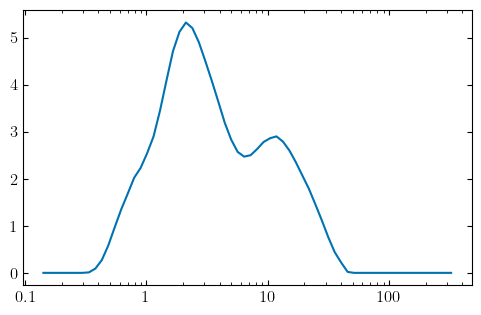

In [38]:
a = experiments.get_DTG(teste=90, marco=2, ID=IDs[0])["d_med"]
b = experiments.get_DTG(teste=90, marco=2, ID=IDs[0])["freq_v"]
plt.plot(a, b)
plt.semilogx()

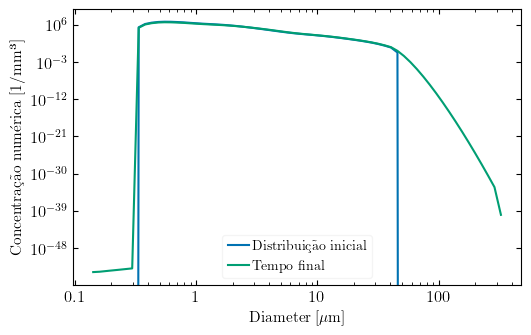

In [35]:
plt.plot(
    sol[0]["pbe_sol"].moc.xi_d * 1e6,
    sol[0]["pbe_sol"].moc.N[0] / 1e9,
    label="Distribuição inicial",
)
plt.plot(
    sol[0]["pbe_sol"].moc.xi_d * 1e6,
    sol[0]["pbe_sol"].moc.N[-1] / 1e9,
    label="Tempo final",
)
plt.xlabel(r"Diameter [$\mu$m]")
plt.ylabel(r"Concentração numérica [1/mm³]")
plt.semilogx()
plt.semilogy()
plt.legend()
# Ta certo!

IndexError: index 10 is out of bounds for axis 0 with size 2

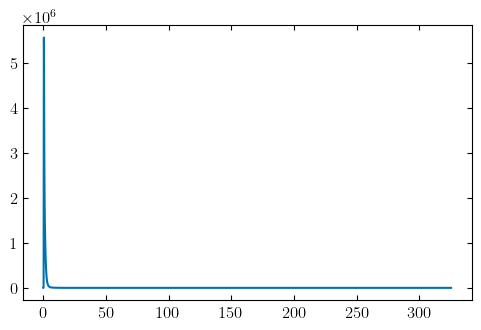

In [20]:
plt.plot(sol[0]["pbe_sol"].moc.xi_d * 1e6, sol[0]["pbe_sol"].moc.N[0] / 1e9, label="t0")
plt.plot(sol[0]["pbe_sol"].moc.xi_d * 1e6, sol[0]["pbe_sol"].moc.N[10] / 1e9, label="t1")
plt.plot(sol[0]["pbe_sol"].moc.xi_d * 1e6, sol[0]["pbe_sol"].moc.N[20] / 1e9, label="t2")
plt.semilogx()
plt.legend()

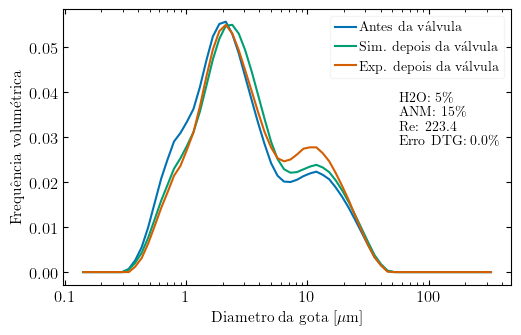

In [24]:
i = 1
DTG_exp_x_sim(sol[i], experiments, i)

## A fazer:
* Implementar outra forma de ler o excel (tá demorando muito): opção, ter um excel reduzido so pros testes iniciais
* Implementar um rotina de otimização global


## Feito
* Modificar o gráfico do DPp GV1 para dividir pela queda de pressão máxima para cada concentração (Feito para cada teste, não executada)
* Implementar uma rotina de otimização com 2 testes de cada concentração
* Integrar até esse tempo de residência
* Implementar um tempo de residencia baseado no volume efetivo (Próximo da válvula)
* Verificar se o d32 bate com o resultado em pdf do bettersize (Verificado)
* Implementar o calculo do d43 (implementado)
* Implementar funções para transformar N para Fv
* Implementar formas de escrever resultados no arquivo (pickle json)
* Checar modelos de quebra, coalescência e gotas filhas
* Checar se as modificações no solucionar tem impacto elevado na solução: Não tem

## Se possível
* Implementar um modelo para calcular o volume efetivo e usar um parâmetro de otimização no modelo (Excelente para a dissertação)

# Escreve a solução

In [23]:
with open(join(dir, "murilo_teste_09-05-2024.pickle"), "wb") as f:
    pickle.dump(sol, f)

In [ ]:
with open(join(dir, "murilo_optglobal_shgo_sobol_11-05-2024.pickle"), "wb") as f:
    pickle.dump(sol_global, f)